In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from qutip.solver.nonmarkov.transfertensor import ttmsolve


In [13]:
gamma_0 = 0.5
n_thermal
def N_th(Temp):
    N = 1/((np.exp(1/Temp))-1)
    return N

N = N_th(0.1)
# Define sigma+, sigma- operators
z_o = basis(2,0)*(basis(2,1).dag())
o_z = basis(2,1)*(basis(2,0).dag())



sigmax()*sigmay()
N
sigmam()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [14]:
#Define c_ops 

# To solve for Zero temp, put Temp  = 0.0001
# def C_OP(Temp):
#     R_1 = np.sqrt(gamma_0*(N_th(Temp)+1)/2)*sigmam()
#     R_2 = np.sqrt(gamma_0*(N_th(Temp))/2)*sigmap()

#     return [R_1,R_2]

R_1 = np.sqrt(gamma_0*(N+1))*sigmap() # I just removed 1/2 within sqrt to make it compatible with qutip c_ops
R_2 = np.sqrt(gamma_0*(N))*sigmam()
# H = - 0.5 * 2*np.pi * sigmaz()  # by adding the hamiltonian here, so we move back to the schrodinger picture

L_1 = 2*spre(R_1)*spost(R_1.dag()) - spre(R_1.dag()*R_1) - spost(R_1.dag()*R_1)
L_2 = 2*spre(R_2)*spost(R_2.dag()) - spre(R_2.dag()*R_2) - spost(R_2.dag()*R_2)

L = L_1 + L_2
L_1

# H = - 0.5 * sigmaz() #*2*np.pi 
H = 0.5 * sigmaz()
ops = [R_1,R_2]
L0 = liouvillian(qeye(2),ops)
# print(L)
# L0


In [15]:
# For SGAD Channel! 
def operator(s,phi):
    R = sigmap()*np.cosh(s) + np.exp(1j*phi)* sigmam()*np.sinh(s)
    R_GAD1 = np.sqrt(gamma_0*(N+1))* R
    R_GAD2 = np.sqrt(gamma_0*(N)) * R.dag()
    return [R_GAD1,R_GAD2]

trial = operator(0.5,np.pi/4)

#First approach to find Liouvillian 
L_GAD = liouvillian(qeye(2),trial)

# Manual Approach to find Liouvillian
LG_1 = 2*spre(R_1)*spost(trial[0].dag()) - spre(trial[0].dag()*trial[0]) - spost(trial[0].dag()*trial[0])
LG_2 = 2*spre(R_2)*spost(trial[1].dag()) - spre(trial[1].dag()*trial[1]) - spost(trial[1].dag()*trial[1])


L_GAD1 = LG_1 + LG_2



In [16]:
tlist = np.linspace(0, 20, 200)


In [17]:
# start in the qubit superposition state
psi0 = (basis(2, 0) + 1 * basis(2, 1)).unit() #2j * basis(2, 0) +
# psi0 = basis(2,0)
psi0

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]

In [18]:
e_ops = [sigmax(), sigmay(), sigmaz()]



In [21]:
#Construct SuperOperator
# L0 = liouvillian(H = 0.5 * sigmaz(), c_ops = ops)

# Set the number of learning steps (the number of times to compute dynamical maps)
num_learning = 50000  # You can adjust this depending on your needs

# Define the options for ttmsolve
options = {
    'store_states': True,      # Store states at each time step
    'normalize_output': True,  # Normalize states to avoid numerical errors
}


result1 = ttmsolve(L0, psi0,times = np.linspace(0.1, 20, 200), e_ops = e_ops, num_learning = num_learning, options = options)

TypeError: Only defined for quantum objects.

In [22]:


result1 = mesolve(H = 0.5 * sigmaz(),rho0=psi0, tlist = np.linspace(0, 20, 200),c_ops=ops ,e_ops=e_ops, options = Options(store_states =True))
result1 = mesolve(L0, psi0, tlist, [], e_ops, options = Options(store_states =True)) # both are equivalent. 

#0.5 * sigmaz()

fidelity(psi0,result1.final_state)
for state in result1.states:
    print(fidelity(psi0,state))
result1.final_state



0.9999999999999998
0.9937769644941684
0.9876705569618291
0.9816790991946687
0.9758008866947553
0.970034234806243
0.9643774721302979
0.9588289405824294
0.9533869960544029
0.9480500084410616
0.9428163619241542
0.9376844550485429
0.9326527002507033
0.9277195242846528
0.9228833683229979
0.9181426878948946
0.9134959528111698
0.9089416476817944
0.9044782714480896
0.9001043377334201
0.8958183748852763
0.8916189257274356
0.8875045482272357
0.8834738149767553
0.879525313492316
0.8756576463673991
0.871869430938347
0.8681592999177465
0.8645259009692874
0.8609678968903388
0.8574839658335782
0.8540728009363586
0.8507331108771234
0.8474636195381167
0.8442630660829848
0.8411302052145477
0.8380638067828542
0.8350626562539337
0.8321255544462106
0.829251317514515
0.8264387772157287
0.8236867805132438
0.8209941899840993
0.8183598836130891
0.8157827545789166
0.813261711227166
0.8107956778020372
0.8083835937310241
0.8060244133530119
0.8037171059788398
0.8014606569157873
0.7992540663452903
0.797096349049662

C:\Users\karak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\qutip\solver\options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[9.99931924e-01 3.36745609e-03]
 [3.36745609e-03 6.80762443e-05]]

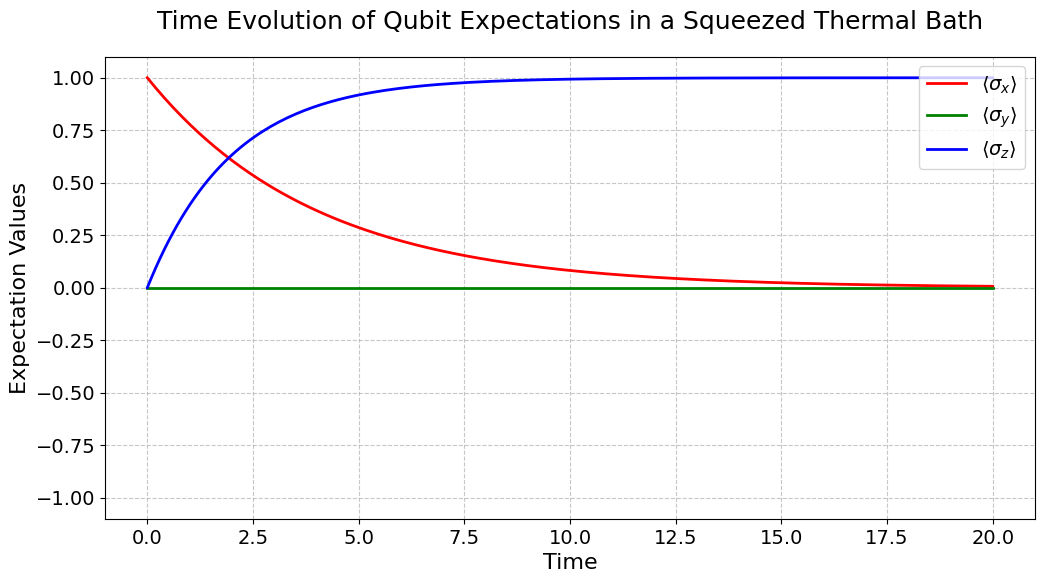

In [9]:
import matplotlib.pyplot as plt

# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(result1.times, result1.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(result1.times, result1.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(result1.times, result1.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title("Time Evolution of Qubit Expectations in a Squeezed Thermal Bath", fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()


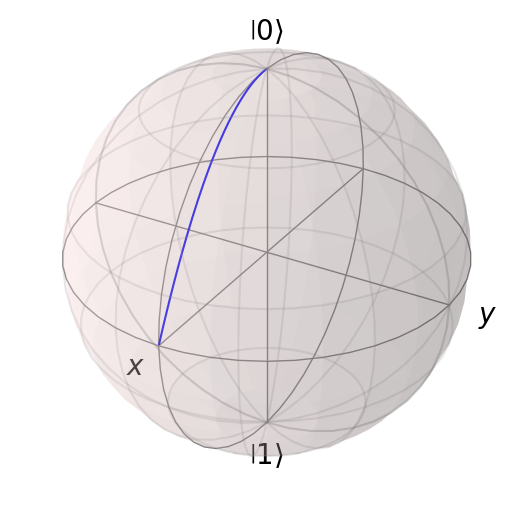

In [10]:
b = Bloch()
b.add_points(result1.expect, meth='l')
b.show()

<>:40: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\l'
<>:40: SyntaxWarning: invalid escape sequence '\l'
<>:41: SyntaxWarning: invalid escape sequence '\l'
C:\Users\DELL\AppData\Local\Temp\ipykernel_23260\1552270817.py:40: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Decay of Fock state $\left|10\\rangle\\right.$' +
C:\Users\DELL\AppData\Local\Temp\ipykernel_23260\1552270817.py:41: SyntaxWarning: invalid escape sequence '\l'
  ' in a thermal environment with $\langle n\\rangle=2$')


10.0%. Run time:   1.43s. Est. time left: 00:00:00:12
20.0%. Run time:   3.42s. Est. time left: 00:00:00:13
30.0%. Run time:   4.59s. Est. time left: 00:00:00:10
40.0%. Run time:   5.86s. Est. time left: 00:00:00:08
50.0%. Run time:   7.68s. Est. time left: 00:00:00:07
60.0%. Run time:   9.56s. Est. time left: 00:00:00:06
70.0%. Run time:  11.21s. Est. time left: 00:00:00:04
80.0%. Run time:  12.46s. Est. time left: 00:00:00:03
90.0%. Run time:  14.32s. Est. time left: 00:00:00:01
100.0%. Run time:  15.67s. Est. time left: 00:00:00:00
Total run time:  15.76s


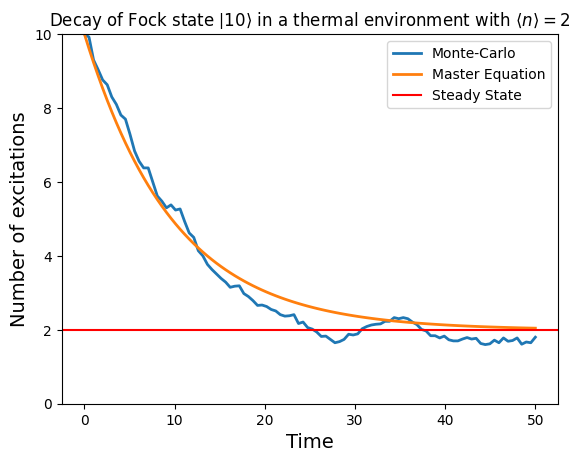

In [11]:
#Example: Harmonic Oscillator in Thermal Bath
import numpy as np
import pylab as plt
from qutip import *
# Define paramters
N = 20  # number of basis states to consider
a = destroy(N)
H = a.dag() * a # omega_0 is missing here
psi0 = basis(N, 10)  # initial state
kappa = 0.1  # coupling to oscillator

# collapse operators
c_op_list = []
n_th_a = 2  # temperature with average of 2 excitations
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)  # decay operators
rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())  # excitation operators

# find steady-state solution
final_state = steadystate(H, c_op_list)
# find expectation value for particle number in steady state
fexpt = expect(a.dag() * a, final_state)

tlist = np.linspace(0, 50, 100)
# monte-carlo
mcdata = mcsolve(H, psi0, tlist, c_op_list, [a.dag() * a], ntraj=100)
# master eq.
medata = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a])

plt.plot(tlist, mcdata.expect[0], tlist, medata.expect[0], lw=2)
# plot steady-state expt. value as horizontal line (should be = 2)
plt.axhline(y=fexpt, color='r', lw=1.5)
plt.ylim([0, 10])
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of excitations', fontsize=14)
plt.legend(('Monte-Carlo', 'Master Equation', 'Steady State'))
plt.title('Decay of Fock state $\left|10\\rangle\\right.$' +
      ' in a thermal environment with $\langle n\\rangle=2$')
plt.show()

In [12]:
#Define Krauss Operator for AD Channel. Here t means gamma_0

z_z = basis(2,0).proj()#ket2dm(basis(2,0))
z_o = basis(2,0)*(basis(2,1).dag())
o_z = basis(2,1)*(basis(2,0).dag())
o_o = basis(2,1).proj()



def ad_0(t):
    return z_z + np.sqrt(1-t)*o_o
AD_0 = QobjEvo(ad_0) 

def ad_1(t):
    return np.sqrt(t)*z_o 
AD_1 = QobjEvo(ad_1) 

#Define Krauss Operator for GAD Channel
rho = o_o
rho_0 = ket2dm(psi0)
# Define Combine Krauss Operator for AD Channel

#print(AD_00)
null = qeye(2)-qeye(2)
s = tensor(null,null)

s = AD_0*rho_0*AD_0.dag() + AD_1*rho_0*AD_1.dag()

s(0.2)
expect(sigmaz(),s(1))

TypeError: incompatible dimensions[2], [20]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data: time points and corresponding density matrix element values
time_points = np.array([0, 1, 2, 3, 4, 5])
rho_11_values = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4])

# Define the model function, e.g., exponential decay
def model_func(t, a, b, c):
    return a * np.exp(-b * t) + c

# Perform curve fitting
popt, pcov = curve_fit(model_func, time_points, rho_11_values)

# Optimal parameters
a_opt, b_opt, c_opt = popt

# Generate fitted values
fitted_values = model_func(time_points, *popt)

# Plot the original data and the fitted function
plt.figure(figsize=(10, 6))
plt.scatter(time_points, rho_11_values, label='Data', color='red')
plt.plot(time_points, fitted_values, label='Fitted function', color='blue')
plt.xlabel('Time')
plt.ylabel(r'$\rho_{11}(t)$')
plt.legend()
plt.title('Curve Fitting for Density Matrix Element $\rho_{11}(t)$')
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.